In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from word_forms.word_forms import get_word_forms
import re

# TODO
Generate node data structures

Think about how to generate DAG


# Generate word Embeddings

## Read Data

In [14]:
words = []
with open("Data/google10000.txt", "r") as file:
    for line in file:
        words.append(line[:-1])

## Count Letters

In [36]:

regex = re.compile('[^a-zA-Z]')

In [47]:
embedding_dict = []
for word in words:
    if len(word) >= 3:
        related = get_word_forms(word)
        for key in related.keys():
    #if related[key] != set():
            for item in related[key]:
                item = regex.sub('', item)
                item = item.lower()
                entry = {char: 0 for char in 'abcdefghijklmnopqrstuvwxyz'}
                for char in item:
                    entry[char] += 1
                entry['word'] = item
                entry['base'] = word# Store word with base meaning
                entry['pos'] = key # store part of speech
                embedding_dict.append(entry)

embeddings = pd.DataFrame(embedding_dict)

In [49]:
embeddings.to_csv('Data/alphabetical_embeddings')

# Visualize Principal Components

In [ ]:
embeddings = pd.read()

In [112]:
# Scale Columns
for column in 'abcdefghijklmnopqrstuvwxyz':
    fitted = StandardScaler().fit(embeddings[[column]])
    embeddings[column] = fitted.transform(embeddings[[column]])
   
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(embeddings[[char for char in 'abcdefghijklmnopqrstuvwxyz']])

embeddings_pca = pd.DataFrame(columns = ['dim1', 'dim2'])
embeddings_pca['words'] = embeddings['word']
embeddings_pca['pos'] = embeddings['pos']
embeddings_pca['dim1'] =  pca_values[:, 0]
embeddings_pca['dim2'] =  pca_values[:, 1]
embeddings_pca['dim3'] =  pca_values[:, 2]
embeddings_pca['len'] = list(map(lambda x: len(x), embeddings_pca['words']))

In [63]:
test.keys()

dict_keys(['n', 'a', 'v', 'r'])

In [64]:
color_dict = {'n': 'red', 'a': 'green', 'v': 'blue', 'r': 'purple'}

In [114]:
from mpl_toolkits.mplot3d import Axes3D

No handles with labels found to put in legend.


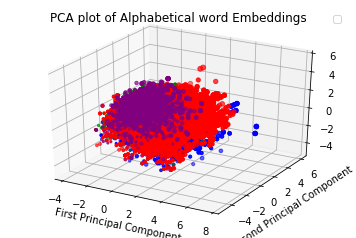

In [115]:
# plot Principle components
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('PCA plot of Alphabetical word Embeddings')
for pos in color_dict.keys():
    ax.scatter(embeddings_pca[embeddings_pca['pos'] == pos]['dim1'], embeddings_pca[embeddings_pca['pos'] == pos]['dim2'], embeddings_pca[embeddings_pca['pos'] == pos]['dim3'], s = embeddings_pca[embeddings_pca['pos'] == pos]['len'], c = color_dict[pos], )
ax.set_ylabel('Second Principal Component')
ax.set_xlabel('First Principal Component')
ax.legend()

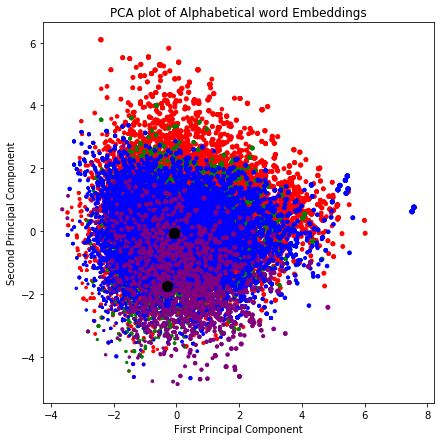

In [86]:
# Plot a certain word
words = ['motor', 'habit']
def plot_words(words):
    fig, ax = plt.subplots(1, figsize = (7,7))
    ax.set_title('PCA plot of Alphabetical word Embeddings')
    for pos in color_dict.keys():
        ax.scatter(embeddings_pca[embeddings_pca['pos'] == pos]['dim1'], embeddings_pca[embeddings_pca['pos'] == pos]['dim2'], s = embeddings_pca[embeddings_pca['pos'] == pos]['len'], c = color_dict[pos], label = pos)
    for word in words:
        ax.scatter(embeddings_pca[embeddings_pca['words'] == word]['dim1'], embeddings_pca[embeddings_pca['words'] ==word]['dim2'], s = 100, c = 'Black')
    ax.set_ylabel('Second Principal Component')
    ax.set_xlabel('First Principal Component') 
plot_words(words)

In [69]:
# Plot a word and related words

In [89]:
def plot_related_words(word):
    words = []
    related = get_word_forms(word)
    for key in related.keys():
    #if related[key] != set():
        for item in related[key]:
            words.append(item)
    plot_words(words)
    return words

['item',
 'items',
 'itemizations',
 'itemisation',
 'itemization',
 'itemisations',
 'itemise',
 'itemize',
 'itemizes',
 'itemizing',
 'itemized',
 'item']

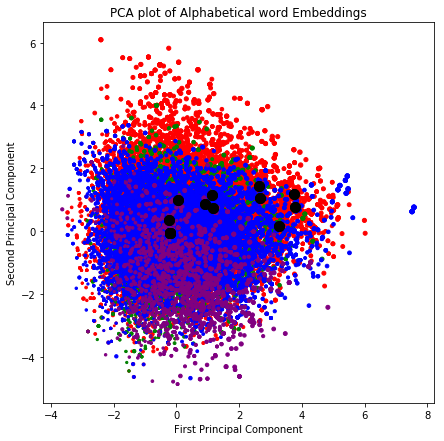

In [94]:
plot_related_words('item')

# Look at letter Importance

In [109]:
imp = list(map(lambda x: abs(x), pca.components_[0]))

In [111]:
for char in np.array(imp).argsort():
    print('abcdefghijklmnopqrstuvwxyz'[char])
    

v
f
j
s
q
y
l
h
b
p
x
u
k
m
d
w
r
a
c
z
o
e
g
t
n
i


In [98]:
pca.explained_variance_ratio_

array([0.07131411, 0.06173514])